# Phase Behaviors of Block Copolymers via Polyorder.jl and Related Packages - Part 3

In [22]:
import Pkg
Pkg.activate(".")

using Polymer
using Scattering
using Polyorder
import Polyorder as JP
using PhaseDiagram
using PolymerArchitectureMakie
using CairoMakie
using LaTeXStrings

  Activating project at `~/SynologyDrive/Develop/Polyorder.jl/docs/tutorial`


In [23]:
# Suppressing displaying source code file location for @info
using Logging
global_logger(ConsoleLogger())

ConsoleLogger(IOBuffer(data=UInt8[...], readable=false, writable=false, seekable=false, append=false, size=0, maxsize=0, ptr=1, mark=-1), Info, Logging.default_metafmt, true, 0, Dict{Any, Int64}())

In [11]:
include("common.jl")

plot_density (generic function with 3 methods)

Macorphase separation may happen when there are more than one component in the polymer system. Moreover, macrophase separation and microphase separation may happen simultaneously when there are least one block copolymer component in the polymer system.

PhaseDiagram.jl provides the function `macrophase` to compute the phase coexistence point.

## DIS-DIS coexistence

First, create an SCFT model. Note that for DIS calculations, only polymer system is imoportant because FH theory is used to calculate the free energy and the chemical potential.

The polymer system is a AB/A binary blend with a symmetric AB diblock copolymer and the length of homopolymer α=0.5, χN=20.0.

In [3]:
model_dis_dis = let
	uc = UnitCell(1.0)
	lat = BravaisLattice(uc)
	system = AB_A_system()
	# Lattice and ds are irrelavent here, because we only interested in DIS phase
	scft = NoncyclicChainSCFT(system, lat, 0.1)
	PolyorderModel(scft)
end

PolyorderModel{NoncyclicChainSCFT{PolymerSystem{Float64}, BlockCopolymerGraph, SimpleFieldModel, Incompressible, AuxiliaryField{Float64, 1, Vector{Float64}, Float64, FFTW.rFFTWPlan{Float64, -1, false, 1, Tuple{Int64}}, AbstractFFTs.ScaledPlan{ComplexF64, FFTW.rFFTWPlan{ComplexF64, 1, false, 1, UnitRange{Int64}}, Float64}}, AuxiliaryField{Float64, 1, Vector{Float64}, Float64, FFTW.rFFTWPlan{Float64, -1, false, 1, Tuple{Int64}}, AbstractFFTs.ScaledPlan{ComplexF64, FFTW.rFFTWPlan{ComplexF64, 1, false, 1, UnitRange{Int64}}, Float64}}, DensityField{Float64, 1, Vector{Float64}, Float64}, Float64, Dict{<:Pair, <:AbstractPropagator}, UnionAll, Dict{<:Pair, <:MDEAlgorithm}, PicardMann{Float64}, Nothing, StressTensorHelper{Vector{AuxiliaryField{Float64, 1, Vector{Float64}, Float64, FFTW.rFFTWPlan{Float64, -1, false, 1, Tuple{Int64}}, AbstractFFTs.ScaledPlan{ComplexF64, FFTW.rFFTWPlan{ComplexF64, 1, false, 1, UnitRange{Int64}}, Float64}}}, FFTW.cFFTWPlan{ComplexF64, -1, false, 1, UnitRange{Int64}

Next, create a `MacrophaseModel` object with the intial guess of volume fractions for two DIS phases being 0.1 and 0.9. ϕ₀ is the initial volume fraction of the AB component before macrophase separation.

In [4]:
macro_dis_dis = MacrophaseModel(model_dis_dis, model_dis_dis;
								phase1=DISPhase, phase2=DISPhase,
								ϕ₁=0.1, ϕ₂=0.9, ϕ₀=0.6, cached=false)

MacrophaseModel{Float64, ϕControlParameter{Polymer.var"#25#27"}, Phase{:DIS}, Phase{:DIS}, PolyorderModel{NoncyclicChainSCFT{PolymerSystem{Float64}, BlockCopolymerGraph, SimpleFieldModel, Incompressible, AuxiliaryField{Float64, 1, Vector{Float64}, Float64, FFTW.rFFTWPlan{Float64, -1, false, 1, Tuple{Int64}}, AbstractFFTs.ScaledPlan{ComplexF64, FFTW.rFFTWPlan{ComplexF64, 1, false, 1, UnitRange{Int64}}, Float64}}, AuxiliaryField{Float64, 1, Vector{Float64}, Float64, FFTW.rFFTWPlan{Float64, -1, false, 1, Tuple{Int64}}, AbstractFFTs.ScaledPlan{ComplexF64, FFTW.rFFTWPlan{ComplexF64, 1, false, 1, UnitRange{Int64}}, Float64}}, DensityField{Float64, 1, Vector{Float64}, Float64}, Float64, Dict{<:Pair, <:AbstractPropagator}, UnionAll, Dict{<:Pair, <:MDEAlgorithm}, PicardMann{Float64}, Nothing, StressTensorHelper{Vector{AuxiliaryField{Float64, 1, Vector{Float64}, Float64, FFTW.rFFTWPlan{Float64, -1, false, 1, Tuple{Int64}}, AbstractFFTs.ScaledPlan{ComplexF64, FFTW.rFFTWPlan{ComplexF64, 1, false, 

Finally, using an optimization algorithm enclosed in `OptimOptimizer` together with the `macrophase` function to solve the coexistence point, which is (0.0193969, 0.927374). `OptimOptimizer` wraps all optimization algorithms provided by the Optim.jl package. It requires 18 SCFT evaluations.

In [6]:
macrophase(OptimOptimizer(), macro_dis_dis; lb=[0.01, 0.6], ub=[0.6, 0.99])

[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.1 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.9 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.049477 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.925833 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.049477 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.925833 	 phase: DIS
[ 

(0.019396914794801327, 0.927373520206245, (18, [0.1, 0.049476937691193164, 0.013965005269791879, 0.01803139206910575, 0.023692262941045192, 0.018070998215757025, 0.019602606041445158, 0.019406409473093696, 0.019396914794801327], [0.9, 0.9258327869145541, 0.9098490536241031, 0.9389819589665497, 0.9245987247725127, 0.9263640800035399, 0.9275484960767838, 0.9273691489020305, 0.927373520206245]))

Other coexistence solvers are available, including:

- `JSOOptimizer`: optimizers provided by the JSOSolvers.jl package
- `OPSOptimizer`: surrogate-based optimizers developed in our group.
- `RootsOptimizer`: root-finding algorithms provided by the Roots.jl package. Requires `SurrogateMacrophaseModel` instead of `MacrophaseModel`.

The `JSOOptimizer` requires 14 SCFT evaluations.

In [7]:
macrophase(JSOOptimizer(), macro_dis_dis; lb=[0.01, 0.6], ub=[0.6, 0.99])

[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.1 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.9 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.01 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.99 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.015943 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.943026 	 phase: DIS
[ Info: 
[

(0.019247774719508448, 0.9273990900777797, (14, Any[], Any[]))

The `OPSOptimizer` requires only 8 SCFT evaluations (the initial guess ignored), which reduces the computational cost by (18-8)/18=56% and (14-8)/14=43% with respect to `OptimOptimizer` and `JSOOptimizer`, respectively.

In [8]:
let
	vecϕ01 = [0.01, 0.2]  # list of initial guesses for phase 1
    vecϕ02 = [0.75, 0.95]  # list of initial guesses for phase 2
    tol_io = 1e-8  # tol for internal optimizer
    tol_oo = 1e-4  # tol for outside optimizer
    ϕ1 = 0.1  # initial guess of the solution for phase 1
    ϕ2 = 0.9  # initial guess of the solution for pahse 2
    ϕ0 = 0.6  # the initial volume fractions of the mixing system, critical for optimizing algorithms, but not used by root finding algorithms.

    io = RootsOptimizer(; x_abstol=tol_io)
    oo = OPSOptimizer(vecϕ01, vecϕ02; optimizer=io, x_abstol=tol_oo)
    ϕ₁, ϕ₂, _ = macrophase(oo, macro_dis_dis)
end

[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.01 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.2 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.75 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.95 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.032363 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.919318 	 phase: DIS
[ Info: 


(0.019250479366955196, 0.9273968777173489, (8, [0.01, 0.2, 0.03236343323368689, 0.019366888203913985, 0.019238593543637494, 0.019250479366955196], [0.75, 0.95, 0.9193179062351898, 0.9275803582778355, 0.9273963955225257, 0.9273968777173489], [-0.5840199493411221, 0.43011822430635704, -0.4825081414833434, -0.544136409098078, -0.5447152939975942, -0.5446616937312446], [2.8751648553811915, 3.6585128610324222, 3.515090825707978, 3.5517772920373716, 3.550947332254343, 3.5509495068823056]))

### Exercises

1. Choose either coexistence optimizer, compute the binodal line for A/B binary blend for χN<10.0 where A and B have same length. Note that the critical point is χN=2.0 for this case.

2. Repeat 1 for A/B binary blend where the length ratio between A and B is 2.

## LAM-DIS coexistence

In this demonstration, we will reproduce part of result reported in Fig.3 of Ref. Mester, Z.; Lynd, N. A.; Fredrickson, G. H. Numerical Self-Consistent Field Theory of Multicomponent Polymer Blends in the Gibbs Ensemble. Soft Matter 2013, 9 (47), 11288.

In [9]:
begin
	ds = 0.01
	uc = UnitCell(7.0)
	lattice = BravaisLattice(uc)
	system_lam = AB_A_system(; χN=10.0, ϕAB=0.5, fA=0.45, α=1.0)
	scft_lam = NoncyclicChainSCFT(system_lam, lattice, ds)
end

Noncyclic Chain SCFT model:
* Free energy: 720.1701051411
* Residual: 0.0
* Stress norm: NaN
* Model type: SimpleFieldModel
* Model compressiblity: Incompressible
-----
PolymerSystem (AB + hA) contains 2 components:

Component AB with ϕ=0.5 and α=1.0 contains BlockCopolymer AB with 2 blocks:
  * PolymerBlock A with f=0.45 of specie A
  * PolymerBlock B with f=0.55 of specie B

Component hA with ϕ=0.5 and α=1.0 contains BlockCopolymer hA with 1 blocks:
  * PolymerBlock hA with f=1.0 of specie A


with Flory-Huggins interaction parameters betwen species:
    (A, B) => 10.0
-----
Simulation Cell: BravaisLattice
  * Centering: p
  * Space group: #1 (p1)
  * Crystal system: Line
  * Unit cell: [7.0] [0]
  * Free lattice parameters: [a]
-----
* Spatial resolution: (48,)
* Contour steps: 0.01
* MDE solvers: Dict[Dict{Any, Any}((2 => 3) => OSF, (2 => 1) => OSF, (1 => 2) => OSF, (3 => 2) => OSF), Dict{Any, Any}((2 => 1) => OSF, (1 => 2) => OSF)]
-----
SCFT updater: PicardMann iteration with α=0

In [10]:
JP.solve!(scft_lam)

[ Info: ******* SCFT Simulation Start *******
[ Info: Algorithm: PicardMann iteration with α=0.2.
[ Info: MDE solvers: ["OSF"]
[ Info: tolerance: 1.0e-5 (Residual)
[ Info: initial F: 720.1701051411
[ Info: initial residual norm: 0.0
[ Info: initial stress norm: NaN
┌ Info: initial unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [7.0]
└   * Angles: [0]
[ Info: 
[ Info: Simulation starts > > > > > >
number: 100                                                                     
F: 0.1756921969                                                                 
resediual norm: 0.0419                                                          
number: 200                                                                     
F: 0.1756132004                                                                 
resediual norm: 0.00229                                                         
number: 300                                                                     
F: 0.1756119561     

[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.1756117667
[ Info: final loss: 9.9e-6
[ Info: final stress norm: 0.0020823855735661195
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [7.0]
└   * Angles: [0]
[ Info: iterations: 680
[ Info: time per iteration: 18 milliseconds, 656 microseconds, 368 nanoseconds
[ Info: Run time: 00:00:12.686330792
[ Info: =======================================


Polyorder.Successful()

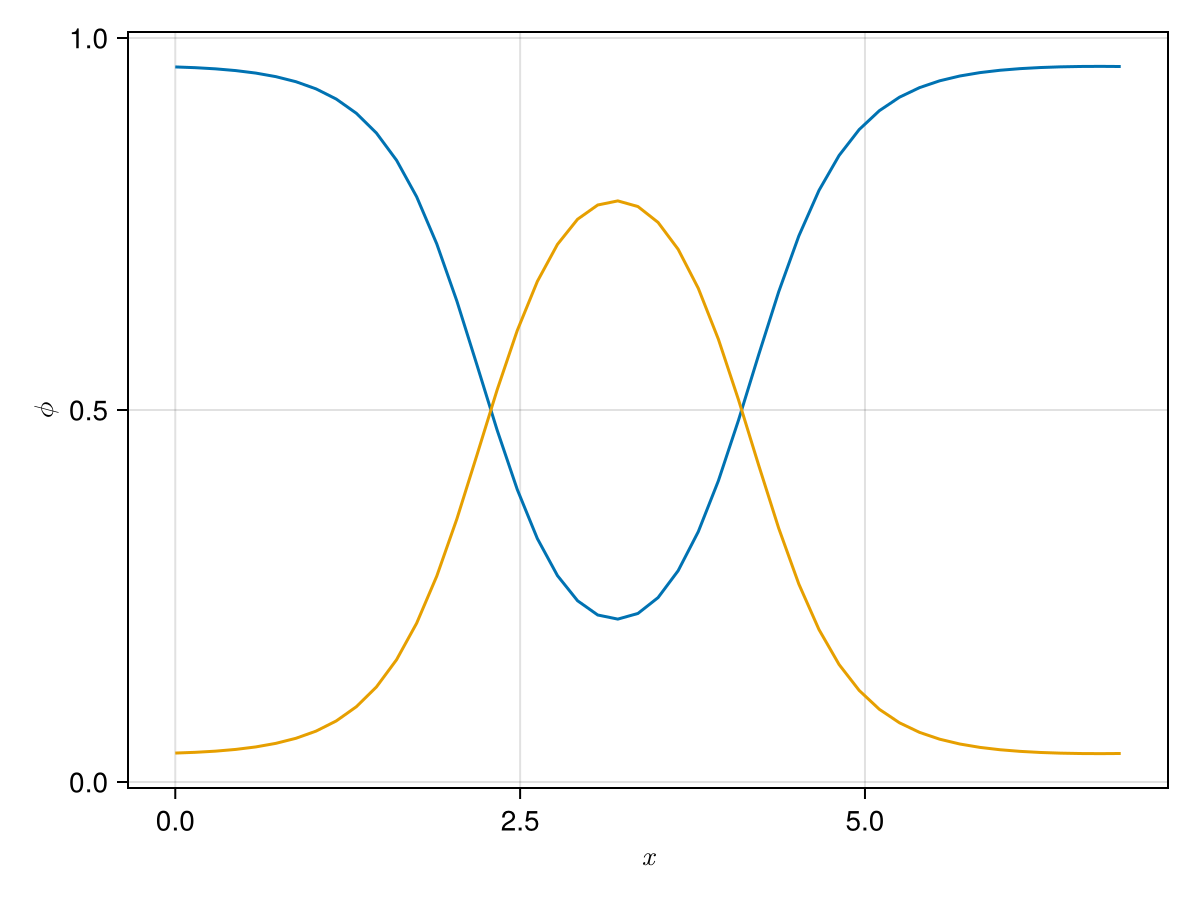

In [12]:
plot_density(scft_lam)

### Batch evaluations

We can compute the free energies for a list of $\phi_{AB}$ values.

In [13]:
begin
	ϕABs_AB_A_lam = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94, 0.96, 0.98]
	ϕAs_AB_A_lam = 1 .- ϕABs_AB_A_lam
	ϕA_AB_A_control = ϕControlParameter(:hA, system_lam)
	Fs_AB_A_lam = similar(ϕAs_AB_A_lam)
	μs_AB_A_lam = similar(ϕAs_AB_A_lam)
	info_AB_A_lam = []
end

Any[]

In [16]:
let
	scft = JP.clone(scft_lam)
	for i in eachindex(ϕAs_AB_A_lam)
		system = Polymer.update!(scft.system, ϕAs_AB_A_lam[i], ϕA_AB_A_control)
		lat = JP.lattice(scft)
		scft = Polyorder.reset(scft, lat, system)
		updater = VariableCell(BB(1.0), SIS(1.0))
		conv, _ = cell_solve!(scft, updater)
		Fs_AB_A_lam[i], μs_AB_A_lam[i] = JP.F(scft), JP.μ̃(scft, 1)
		# Store extra information
		info = (convgence=conv, ϕA=ϕAs_AB_A_lam[i], 
				F = JP.F(scft),
				Lx=first(JP.unitcell(scft).edges),
				Nx=first(size(first(scft.ϕfields))))
		push!(info_AB_A_lam, info)
	end
end

[ Info: ###### Cell Optimization Start ######
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.0.
└ Run fields updater 1 times per cell iteration.
[ Info: Cell optimization starts ...
[ Info: ******* SCFT Simulation Start *******
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.0.
└ Run fields updater 1 times per cell iteration.
[ Info: MDE solvers: ["OSF"]
[ Info: tolerance: 1.0e-5 (stress norm)
[ Info: tolerance: 1.0e-8 (F)
[ Info: initial F: 181.0270083461
[ Info: initial residual norm: 0.0
[ Info: initial stress norm: NaN
┌ Info: initial unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [7.0]
└   * Angles: [0]
[ Info: 
[ Info: Simulation starts > > > > > >


[ Info: final loss: 1.7375060412661014e-5
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.1753858925
[ Info: final loss: 1.74e-5
[ Info: final stress norm: 7.3e-9
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [7.222598034420648]
└   * Angles: [0]
[ Info: iterations: 70
[ Info: time per iteration: 44 milliseconds, 166 microseconds, 520 nanoseconds
[ Info: Run time: 00:00:03.091656416
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [7.222598034420648]
└   * Angles: [0]
[ Info: Final F: 0.17538589251167847
[ Info: Final loss: 1.7375060412661014e-5
[ Info: Final stress: 7.3022332846330254e-9
[ Info:

[ Info: final loss: 0.00025208764033535225
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.4215465613
[ Info: final loss: 0.000252
[ Info: final stress norm: 1.5e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [5.861533236860739]
└   * Angles: [0]
[ Info: iterations: 84
[ Info: time per iteration: 35 milliseconds, 874 microseconds, 236 nanoseconds
[ Info: Run time: 00:00:03.013435834
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [5.861533236860739]
└   * Angles: [0]
[ Info: Final F: 0.4215465612859841
[ Info: Final loss: 0.00025208764033535225
[ Info: Final stress: 1.498825554367414e-8
[ Info

[ Info: final loss: 0.0003275730575036384
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.6673111418
[ Info: final loss: 0.000328
[ Info: final stress norm: 2.16e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.929826795144644]
└   * Angles: [0]
[ Info: iterations: 79
[ Info: time per iteration: 8 milliseconds, 925 microseconds, 127 nanoseconds
[ Info: Run time: 00:00:00.705085042
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.929826795144644]
└   * Angles: [0]
[ Info: Final F: 0.6673111417630944
[ Info: Final loss: 0.0003275730575036384
[ Info: Final stress: 2.158037709191315e-8
[ Info: 

[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.9135543175
[ Info: final loss: 0.000394
[ Info: final stress norm: 7.92e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.263926518104135]
└   * Angles: [0]
[ Info: iterations: 70
[ Info: time per iteration: 32 milliseconds, 92 microseconds, 557 nanoseconds
[ Info: Run time: 00:00:02.246479042
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.263926518104135]
└   * Angles: [0]
[ Info: Final F: 0.9135543175190621
[ Info: Final loss: 0.0003940318026385281
[ Info: Final stress: 7.915214759607598e-8
[ Info: Total solve! calls: 70
[ Info: Total SCFT iterations: 70
[ Info: Total time: 00:00:03
[ Info: ####

[ Info: final loss: 3.245804680451769e-5
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.0379040628
[ Info: final loss: 3.25e-5
[ Info: final stress norm: 1.46e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.9892213257250275]
└   * Angles: [0]
[ Info: iterations: 109
[ Info: time per iteration: 54 milliseconds, 844 microseconds, 876 nanoseconds
[ Info: Run time: 00:00:05.9780915
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.9892213257250275]
└   * Angles: [0]
[ Info: Final F: 1.0379040628386773
[ Info: Final loss: 3.245804680451769e-5
[ Info: Final stress: 1.45916323498417e-8
[ Info: To

[ Info: final loss: 0.0002648830884579567
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.1643966289
[ Info: final loss: 0.000265
[ Info: final stress norm: 1.2e-7
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.7303140657850404]
└   * Angles: [0]
[ Info: iterations: 119
[ Info: time per iteration: 35 milliseconds, 378 microseconds, 320 nanoseconds
[ Info: Run time: 00:00:04.210020125
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.7303140657850404]
└   * Angles: [0]
[ Info: Final F: 1.1643966289096708
[ Info: Final loss: 0.0002648830884579567
[ Info: Final stress: 1.2037796595969677e-7
[ In

[ Info: final loss: 0.0001929236536186707
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.2161412607
[ Info: final loss: 0.000193
[ Info: final stress norm: 6.32e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.626354456058744]
└   * Angles: [0]
[ Info: iterations: 161
[ Info: time per iteration: 32 milliseconds, 727 microseconds, 273 nanoseconds
[ Info: Run time: 00:00:05.269091042
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.626354456058744]
└   * Angles: [0]
[ Info: Final F: 1.216141260742536
[ Info: Final loss: 0.0001929236536186707
[ Info: Final stress: 6.319792992582942e-8
[ Info:

[ Info: final loss: 0.00041892190366477067
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.2690944274
[ Info: final loss: 0.000419
[ Info: final stress norm: 6.15e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.519249803709372]
└   * Angles: [0]
[ Info: iterations: 251
[ Info: time per iteration: 33 milliseconds, 744 microseconds, 419 nanoseconds
[ Info: Run time: 00:00:08.469849375
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.519249803709372]
└   * Angles: [0]
[ Info: Final F: 1.269094427426566
[ Info: Final loss: 0.00041892190366477067
[ Info: Final stress: 6.15012041081532e-8
[ Info

[ Info: final loss: 0.0005804610908087815
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.3242183764
[ Info: final loss: 0.00058
[ Info: final stress norm: 2.45e-9
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.408829092140954]
└   * Angles: [0]
[ Info: iterations: 1010
[ Info: time per iteration: 33 milliseconds, 336 microseconds, 523 nanoseconds
[ Info: Run time: 00:00:33.669888875
[ Info: =======================================
[ Info: Cell optimization finished.


[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.408829092140954]
└   * Angles: [0]
[ Info: Final F: 1.3242183763959585
[ Info: Final loss: 0.0005804610908087815
[ Info: Final stress: 2.445793487603871e-9
[ Info: Total solve! calls: 1010
[ Info: Total SCFT iterations: 1010
[ Info: Total time: 00:00:34
[ Info: ###### Cell Optimization Start ######
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.0.
└ Run fields updater 1 times per cell iteration.
[ Info: Cell optimization starts ...
[ Info: ******* SCFT Simulation Start *******
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.0.
└ Run fields updater 1 times per cell iterat

[ Info: final loss: 0.0005974734624754618
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.3867512957
[ Info: final loss: 0.000597
[ Info: final stress norm: 3.11e-11
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.3132505976473796]
└   * Angles: [0]
[ Info: iterations: 151
[ Info: time per iteration: 33 milliseconds, 625 microseconds, 267 nanoseconds
[ Info: Run time: 00:00:05.077415375
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.3132505976473796]
└   * Angles: [0]
[ Info: Final F: 1.3867512957064825
[ Info: Final loss: 0.0005974734624754618
[ Info: Final stress: 3.113404619737717e-11
[ 

Visualize the free energy curves of LAM and DIS phase.

In [17]:
begin
	ϕAs_AB_A_dis = 0.01:0.01:0.99
	ϕABs_AB_A_dis = 1 .- ϕAs_AB_A_dis
	Fs_AB_A_dis = similar(ϕAs_AB_A_dis)
	μs_AB_A_dis = similar(ϕAs_AB_A_dis)
	for i in eachindex(ϕAs_AB_A_dis)
		system = Polymer.update!(system_lam, ϕAs_AB_A_dis[i], ϕA_AB_A_control)
		Fs_AB_A_dis[i], μs_AB_A_dis[i] = JP.F_DIS(system), JP.μ̃_DIS(system, 1)
	end
end

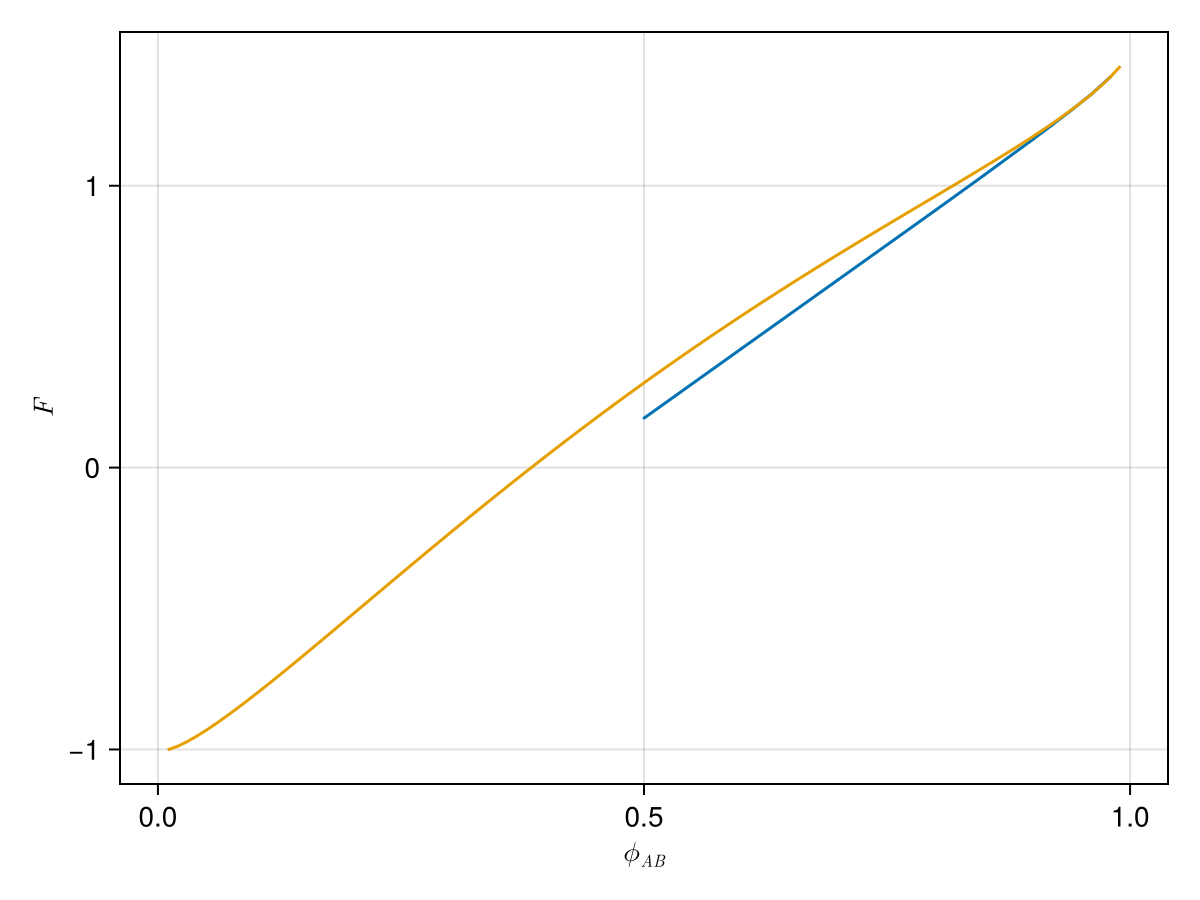

In [19]:
let
	f = Figure()
	ax = Axis(f[1, 1],
	    xlabel = L"$\phi_{AB}$",
	    ylabel = L"$F$",
	)
	lines!(ax, ϕABs_AB_A_lam, Fs_AB_A_lam, label="LAM")
	scatter!(ax, ϕABs_AB_A_lam, Fs_AB_A_lam, label=nothing; markersize=2)
	lines!(ax, ϕABs_AB_A_dis[1:end], Fs_AB_A_dis[1:end], label="DIS")
	f
end

The same straight line is subtracted from both the free energy curves of the LAM and DIS phases. It can be seen that

* when $\phi_A < 0.06$ ($\phi_{AB}>0.94$), LAM reduces to DIS. Thus in this region, the stable phase is DIS.
* A cotangent line can be constructed by connecting $\phi_{A} \approx 0.25$ ($\phi_{AB} \approx 0.75$) and $\phi_{A} \approx 0.93$ ($\phi_{AB} \approx 0.07$). Thus in this region, LAM and DIS coexist.
* When $0.06 < \phi_{A} < 0.25$ ($0.75 < \phi_{AB} < 0.94$), LAM is the stable phase.
* When $\phi_{A} > 0.93$ ($\phi_{AB} < 0.07$), DIS is the stable phase again.

These observations are consistent with the result presented in Fig. 3 of Ref. Mester, Z.; Lynd, N. A.; Fredrickson, G. H. Numerical Self-Consistent Field Theory of Multicomponent Polymer Blends in the Gibbs Ensemble. Soft Matter 2013, 9 (47), 11288.

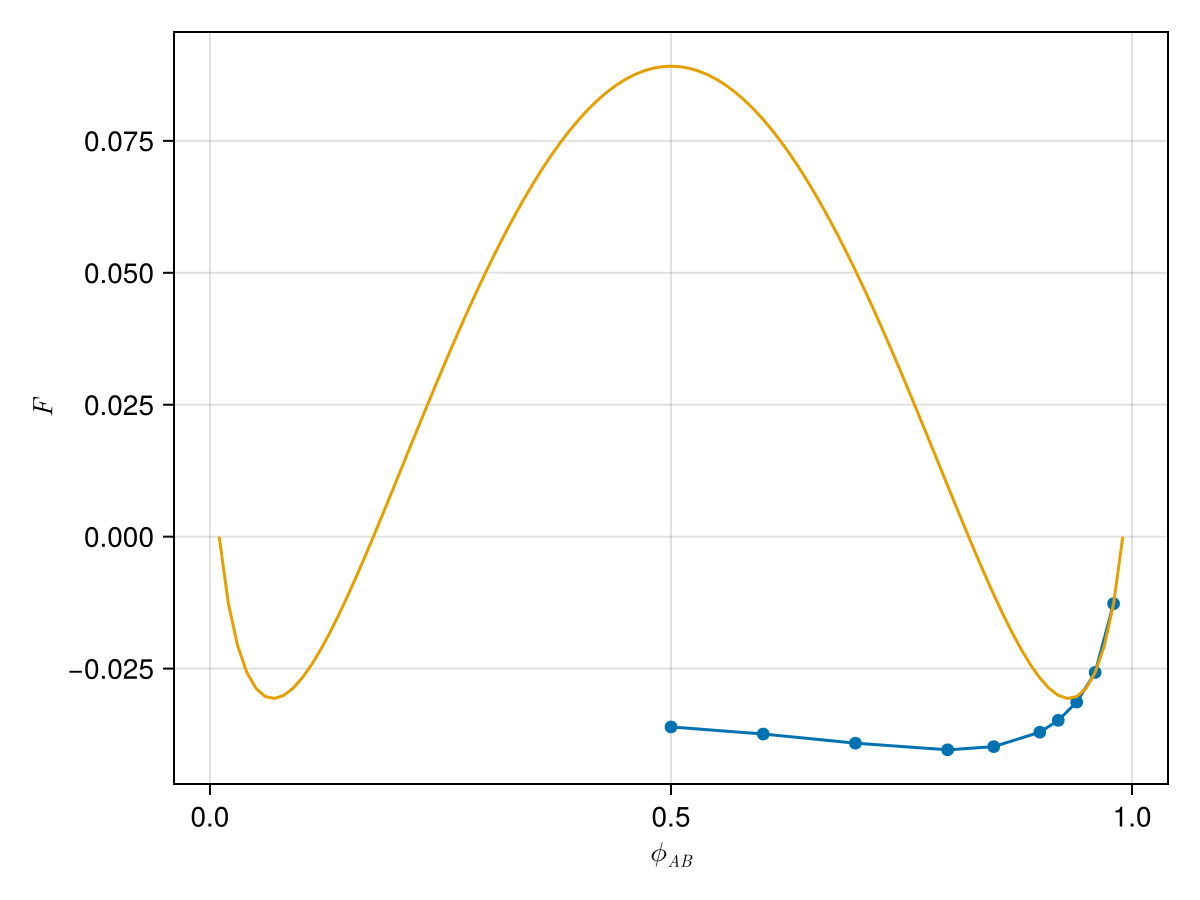

In [20]:
let
	f = Figure()
	ax = Axis(f[1, 1],
	    xlabel = L"$\phi_{AB}$",
	    ylabel = L"$F$",
	)
	line = get_line(ϕABs_AB_A_dis[1], Fs_AB_A_dis[1], ϕABs_AB_A_dis[end], Fs_AB_A_dis[end])
	F_lam = subtract_line(line, ϕABs_AB_A_lam, Fs_AB_A_lam)
	lines!(ax, ϕABs_AB_A_lam, F_lam, label="LAM")
	scatter!(ax, ϕABs_AB_A_lam, F_lam, label=nothing)
	F_dis = subtract_line(line, ϕABs_AB_A_dis, Fs_AB_A_dis)
	lines!(ax, ϕABs_AB_A_dis, F_dis, label="DIS")
	f
end

### RootsOptimizer

RootsOptimizer is less robust than other optimizers. You have to make sure that the data range should not include any inflection point in the free energy curve.

The other important thing to bare in mind is that the chemical potential returned is for the first component in the polymer system, which is AB block copolymer in our `AB_A_system()`. Therefore, we have to use $\phi_{AB}$ as the independent variable.

The coexistence point in ϕAB is 0.0670242 and 0.751779 as computed.

In [35]:
let
	# ϕAB range for DIS phase is [0.02, 0.2]
	s1 = CHSplineSurrogate(reverse(ϕABs_AB_A_dis)[2:20] |> collect, reverse(Fs_AB_A_dis)[2:20] |> collect, reverse(μs_AB_A_dis)[2:20] |> collect)
	# ϕAB range for LAM phase is [0.7, 0.98]
	s2 = CHSplineSurrogate(ϕABs_AB_A_lam[3:end] |> collect, Fs_AB_A_lam[3:end] |> collect, μs_AB_A_lam[3:end] |> collect)
	smp = SurrogateMacrophaseModel(s1, s2, ϕA_AB_A_control; ϕ₁=0.1, ϕ₂=0.8, ϕ₀=0.6)

	# macrophase(JSOOptimizer(), smp; lb=[0.02, 0.7], ub=[0.2, 0.9])  # also works.
	# macrophase(OptimOptimizer(), smp; lb=[0.02, 0.7], ub=[0.2, 0.9])  # also works
	# RootsOptimizer's bound depends on the input surrogates, cannot be set separately.
	macrophase(RootsOptimizer(), smp)
end

(0.06703235250368166, 0.7526109355146741, nothing)

### OPSOptimizer

Internal optimizer is used for computing the coexistence based on surrogates. The most robust internal optimizer is the `OptimOptimizer`. For this particular case, `JSOOptimizer` fails.

The coexistence point in ϕAB is 0.0.0670345 and 0.752099 as computed.

In [36]:
let
	ds = 0.01
	uc = UnitCell(5.0)
	lat = BravaisLattice(uc)
	system = AB_A_system(; χN=10.0, ϕAB=0.7, fA=0.45, α=1.0)
	ϕAB_control = ϕControlParameter(:AB, system)

	scft_dis = NoncyclicChainSCFT(system, lat, 0.1)

	scft = NoncyclicChainSCFT(system, lat, ds)
	JP.solve!(scft)
	updater = VariableCell(BB(1.0), SIS(1.0))
	scft_lam = NoncyclicChainSCFT(system, lat, ds; updater)
	JP.initialize!(scft_lam, scft.wfields)
	
	model_dis = PolyorderModel(scft_dis)
	model_lam = PolyorderModel(scft_lam)

	# All ϕs are for AB diblock copolymer
	ϕdis_init = [0.02, 0.2]
	# ϕlam_init = [0.6, 0.8]  # [0.6, 0.8] works for OptimOptimizer and RootsOptimizer
	ϕlam_init = [0.7, 0.9]
	tol_io = 1e-8
	tol_oo = 1e-4
	ϕ1, ϕ2, ϕ0 = 0.1, 0.8, 0.6

	m = MacrophaseModel(model_dis, model_lam, ϕAB_control;
						phase1=DISPhase, phase2=LAMPhase,
					    ϕ₁=ϕ1, ϕ₂=ϕ2, ϕ₀=ϕ0, cached=true)
    # io = RootsOptimizer(x_abstol=tol_io)
	io = OptimOptimizer(x_abstol=tol_io)
    oo = OPSOptimizer(ϕdis_init, ϕlam_init; optimizer=io, x_abstol=tol_oo)
    ϕ₁, ϕ₂, _ = macrophase(oo, m)
end

[ Info: ******* SCFT Simulation Start *******
[ Info: Algorithm: PicardMann iteration with α=0.2.
[ Info: MDE solvers: ["OSF"]
[ Info: tolerance: 1.0e-5 (Residual)
[ Info: initial F: 720.9558880102
[ Info: initial residual norm: 0.0
[ Info: initial stress norm: NaN
┌ Info: initial unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [5.0]
└   * Angles: [0]
[ Info: 
[ Info: Simulation starts > > > > > >
number: 100                                                                     
F: 0.6673662732                                                                 
resediual norm: 0.0784                                                          
number: 200                                                                     
F: 0.6673799913                                                                 
resediual norm: 0.00182                                                         
number: 300                                                                     
F: 0.6673794148     

[ Info: final loss: 9.939023926541779e-6
[ Info: Stop triggered by EarlyStopping.Threshold(1.0e-5) stopping criterion. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.6673792426
[ Info: final loss: 9.94e-6
[ Info: final stress norm: 0.0019443754547401437
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [5.0]
└   * Angles: [0]
[ Info: iterations: 666
[ Info: time per iteration: 24 milliseconds, 557 microseconds, 529 nanoseconds
[ Info: Run time: 00:00:16.355314875
[ Info: =======================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.02 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.2 	 phase: DIS
[ Info: 
[ Info: ===================================================

[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.7 	 phase: LAM
[ Info: 
[ Info: ======================================================
[ Info: ###### Cell Optimization Start ######
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.0.
└ Run fields updater 1 times per cell iteration.
[ Info: Cell optimization starts ...
[ Info: ******* SCFT Simulation Start *******
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.0.
└ Run fields updater 1 times per cell iteration.
[ Info: MDE solvers: ["OSF"]
[ Info: tolerance: 1.0e-5 (stress norm)
[ Info: tolerance: 1.0e-5 (Residual)
[ Info: initial F: 720.356159165
[ Info: initial residual norm: 0.0
[ Info: initial stress norm: NaN
┌ Info: initial unit cell: UnitCell
│

[ Info: final loss: 9.907502175998673e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.6673106237
[ Info: final loss: 9.91e-6
[ Info: final stress norm: 4.72e-9
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.92981576978046]
└   * Angles: [0]
[ Info: iterations: 62
[ Info: time per iteration: 21 milliseconds, 790 microseconds, 377 nanoseconds
[ Info: Run time: 00:00:01.351003417
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.92981576978046]
└   * Angles: [0]
[ Info: Final F: 0.6673106236727246
[ Info: Final loss: 9.907502175998673e-6
[ Info: Final stress: 4.721532842490147e-9
[ Info: Tota

[ Info: final loss: 9.90966820246797e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 1.164395145
[ Info: final loss: 9.91e-6
[ Info: final stress norm: 3.08e-9
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.7302715981263175]
└   * Angles: [0]
[ Info: iterations: 204
[ Info: time per iteration: 33 milliseconds, 441 microseconds, 222 nanoseconds
[ Info: Run time: 00:00:06.822009375
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [3.7302715981263175]
└   * Angles: [0]
[ Info: Final F: 1.1643951450262653
[ Info: Final loss: 9.90966820246797e-6
[ Info: Final stress: 3.0794294593692016e-9
[ Info: T

[ Info: final loss: 9.96255661189771e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.9133837134
[ Info: final loss: 9.96e-6
[ Info: final stress norm: 2.93e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.264300923323836]
└   * Angles: [0]
[ Info: iterations: 148
[ Info: time per iteration: 32 milliseconds, 643 microseconds, 6 nanoseconds
[ Info: Run time: 00:00:04.831165
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.264300923323836]
└   * Angles: [0]
[ Info: Final F: 0.91338371337942
[ Info: Final loss: 9.96255661189771e-6
[ Info: Final stress: 2.9318231905854355e-8
[ Info: Total sol

[ Info: final loss: 9.941761618059708e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.8021101021
[ Info: final loss: 9.94e-6
[ Info: final stress norm: 1.47e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.540214650322789]
└   * Angles: [0]
[ Info: iterations: 116
[ Info: time per iteration: 32 milliseconds, 194 microseconds, 301 nanoseconds
[ Info: Run time: 00:00:03.734539
[ Info: =======================================
[ Info: Cell optimization finished.


[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.540214650322789]
└   * Angles: [0]
[ Info: Final F: 0.8021101020932409
[ Info: Final loss: 9.941761618059708e-6
[ Info: Final stress: 1.4705186359316905e-8
[ Info: Total solve! calls: 116
[ Info: Total SCFT iterations: 116
[ Info: Total time: 00:00:04
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.067057 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.751814 	 phase: LAM
[ Info: 
[ Info: ======================================================
[ Info: ###### Cell Optimization Start ######
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=

[ Info: final loss: 9.767963858653417e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.7946800195
[ Info: final loss: 9.77e-6
[ Info: final stress norm: 9.7e-9
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.559950999555545]
└   * Angles: [0]
[ Info: iterations: 68
[ Info: time per iteration: 33 milliseconds, 599 microseconds, 242 nanoseconds
[ Info: Run time: 00:00:02.2847485
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.559950999555545]
└   * Angles: [0]
[ Info: Final F: 0.7946800195300836
[ Info: Final loss: 9.767963858653417e-6
[ Info: Final stress: 9.69507721516501e-9
[ Info: Total 

[ Info: final loss: 9.901776229170878e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.7943869349
[ Info: final loss: 9.9e-6
[ Info: final stress norm: 1.92e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.560731568695286]
└   * Angles: [0]
[ Info: iterations: 31
[ Info: time per iteration: 33 milliseconds, 835 microseconds, 186 nanoseconds
[ Info: Run time: 00:00:01.048890791
[ Info: =======================================
[ Info: Cell optimization finished.


[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.560731568695286]
└   * Angles: [0]
[ Info: Final F: 0.7943869349178774
[ Info: Final loss: 9.901776229170878e-6
[ Info: Final stress: 1.9220510451415284e-8
[ Info: Total solve! calls: 31
[ Info: Total SCFT iterations: 31
[ Info: Total time: 00:00:02
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.067042 	 phase: DIS
[ Info: 
[ Info: ======================================================
[ Info: ======================================================
[ Info: 
[ Info: 	 ϕ = 0.751695 	 phase: LAM
[ Info: 
[ Info: ======================================================
[ Info: ###### Cell Optimization Start ######
┌ Info: Algorithm: Variable cell method
│ * cell updater: Barzilai-Borwein (BB2) method with max step size =1.0.
│ * fields updater: 1S semi-implicit method (SIS-1) with α=1.

[ Info: final loss: 9.04383725108815e-6
[ Info: Stop triggered by a `ThresholdStress` control. 
[ Info: > > > > > > Simulation finished.
[ Info: 
[ Info: ------ SCFT Simulation Summary ------
[ Info: convergence: Polyorder.Successful()
[ Info: final F: 0.7943869963
[ Info: final loss: 9.04e-6
[ Info: final stress norm: 2.19e-8
┌ Info: final unit cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.560731568695286]
└   * Angles: [0]
[ Info: iterations: 2
[ Info: time per iteration: 37 milliseconds, 130 microseconds, 604 nanoseconds
[ Info: Run time: 00:00:00.074261208
[ Info: =======================================
[ Info: Cell optimization finished.
[ Info: ------ Cell Optimization Summary ------
[ Info: Convergence: Polyorder.Successful()
┌ Info: Stress-free cell: UnitCell
│   * Crystal system: Line
│   * Edges: [4.560731568695286]
└   * Angles: [0]
[ Info: Final F: 0.7943869963186376
[ Info: Final loss: 9.04383725108815e-6
[ Info: Final stress: 2.192329061339682e-8
[ Info: Total

(0.06704174972913164, 0.7516946991535541, (10, [0.02, 0.2, 0.07798579139970899, 0.06378889998892648, 0.06705656062094142, 0.06704175376223248, 0.06704174972913164], [0.7, 0.9, 0.7999320285115147, 0.7548322502327519, 0.7518137250351191, 0.7516946847988539, 0.7516946991535541], [-0.989249113279732, -0.5214024235381877, -0.8632977429331552, -0.898737825429661, -0.8907488380395223, -0.890785284028371, -0.8907852939552537], [0.6673106236727246, 1.1643951450262653, 0.91338371337942, 0.8021101020932409, 0.7946800195300836, 0.7943869349178774, 0.7943869963186376]))

### Exercises

1. Reproduce the whole Fig.3 of Ref. Mester, Z.; Lynd, N. A.; Fredrickson, G. H. Numerical Self-Consistent Field Theory of Multicomponent Polymer Blends in the Gibbs Ensemble. Soft Matter 2013, 9 (47), 11288.